In [86]:
#some other dependencies


#!pip install smart_open  
#!ip install smart_open[aws] 
#!pip install smart_open[gcp] 
#!pip install smart_open[all]

# !sudo apt-get install default-jdk
# !sudo apt-get install ant
# !pip install --upgrade gensim

In [1]:
from google.colab import drive
drive.mount("/content/gdrive")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import nltk
import re
import pandas as pd
from pprint import pprint

%matplotlib inline

In [3]:
## Gensim 

import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

In [4]:
## spacy for lemmatization
import spacy

In [16]:
!pip install pyLDAvis

     |████████████████████████████████| 1.6MB 2.8MB/s 
     |████████████████████████████████| 552kB 19.6MB/s 
  Created wheel for pyLDAvis: filename=pyLDAvis-2.1.2-py2.py3-none-any.whl size=97711 sha256=833f280087d574a1a786b74997f0a0a5001f550980038f8b3aa43a803bc3a5f5
  Stored in directory: /root/.cache/pip/wheels/98/71/24/513a99e58bb6b8465bae4d2d5e9dba8f0bef8179e3051ac414
  Created wheel for funcy: filename=funcy-1.14-py2.py3-none-any.whl size=32042 sha256=876ee53d963cc31b7ff7651440d4faf483abfce83aacae9785ddb34ca6f87463
  Stored in directory: /root/.cache/pip/wheels/20/5a/d8/1d875df03deae6f178dfdf70238cca33f948ef8a6f5209f2eb
Successfully built pyLDAvis funcy


In [17]:
## Plotting tools

import pyLDAvis
import pyLDAvis.gensim

In [18]:
import warnings 
warnings.filterwarnings("ignore" ,category= DeprecationWarning)

In [19]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [20]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

In [21]:
extended_stopwords_list = ['from' , 'subject' ,'re' , 'edu' ,'use' ] #this depend on dataset
stop_words.extend(extended_stopwords_list)

In [24]:
!wget https://raw.githubusercontent.com/selva86/datasets/master/newsgroups.json

--2020-06-25 10:15:35--  https://raw.githubusercontent.com/selva86/datasets/master/newsgroups.json
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23237087 (22M) [text/plain]
Saving to: ‘newsgroups.json’

newsgroups.json     100%[===================>]  22.16M  41.3MB/s    in 0.5s    

2020-06-25 10:15:36 (41.3 MB/s) - ‘newsgroups.json’ saved [23237087/23237087]



In [25]:
df = pd.read_json('newsgroups.json')

In [26]:
df.head()

,content,target,target_names
0,From: lerxst@wam.umd.edu (where's my thing)\nS...,7,rec.autos
1,From: guykuo@carson.u.washington.edu (Guy Kuo)...,4,comp.sys.mac.hardware
2,From: twillis@ec.ecn.purdue.edu (Thomas E Will...,4,comp.sys.mac.hardware
3,From: jgreen@amber (Joe Green)\nSubject: Re: W...,1,comp.graphics
4,From: jcm@head-cfa.harvard.edu (Jonathan McDow...,14,sci.space


In [27]:
len(df.target_names.unique())

20

In [28]:
data = df.content.values.tolist()

In [29]:
pprint(data[:2])

["From: lerxst@wam.umd.edu (where's my thing)\n"
 'Subject: WHAT car is this!?\n'
 'Nntp-Posting-Host: rac3.wam.umd.edu\n'
 'Organization: University of Maryland, College Park\n'
 'Lines: 15\n'
 '\n'
 ' I was wondering if anyone out there could enlighten me on this car I saw\n'
 'the other day. It was a 2-door sports car, looked to be from the late 60s/\n'
 'early 70s. It was called a Bricklin. The doors were really small. In '
 'addition,\n'
 'the front bumper was separate from the rest of the body. This is \n'
 'all I know. If anyone can tellme a model name, engine specs, years\n'
 'of production, where this car is made, history, or whatever info you\n'
 'have on this funky looking car, please e-mail.\n'
 '\n'
 'Thanks,\n'
 '- IL\n'
 '   ---- brought to you by your neighborhood Lerxst ----\n'
 '\n'
 '\n'
 '\n'
 '\n',
 'From: guykuo@carson.u.washington.edu (Guy Kuo)\n'
 'Subject: SI Clock Poll - Final Call\n'
 'Summary: Final call for SI clock reports\n'
 'Keywords: SI,acceleration,cl

In [30]:
def preprocess_data(data):
  data = [re.sub('\S*@\S*\s?', '', sent) for sent in data]
  data = [re.sub('\s+', ' ', sent) for sent in data]
  data = [re.sub("\'", "", sent) for sent in data]

  return data

In [31]:
data = preprocess_data(data)

In [32]:
pprint(data[:4])

['From: (wheres my thing) Subject: WHAT car is this!? Nntp-Posting-Host: '
 'rac3.wam.umd.edu Organization: University of Maryland, College Park Lines: '
 '15 I was wondering if anyone out there could enlighten me on this car I saw '
 'the other day. It was a 2-door sports car, looked to be from the late 60s/ '
 'early 70s. It was called a Bricklin. The doors were really small. In '
 'addition, the front bumper was separate from the rest of the body. This is '
 'all I know. If anyone can tellme a model name, engine specs, years of '
 'production, where this car is made, history, or whatever info you have on '
 'this funky looking car, please e-mail. Thanks, - IL ---- brought to you by '
 'your neighborhood Lerxst ---- ',
 'From: (Guy Kuo) Subject: SI Clock Poll - Final Call Summary: Final call for '
 'SI clock reports Keywords: SI,acceleration,clock,upgrade Article-I.D.: '
 'shelley.1qvfo9INNc3s Organization: University of Washington Lines: 11 '
 'NNTP-Posting-Host: carson.u.washington

In [33]:
## remove puntuation and unnecessary words using gensim simple preprocess 

def gensim_preprocess(data):
  for line in data:
    yield(gensim.utils.simple_preprocess(str(line), deacc=True))  # deacc=True removes punctuations


data = list(gensim_preprocess(data))

print(data[:4])
print(type(data))

[['from', 'wheres', 'my', 'thing', 'subject', 'what', 'car', 'is', 'this', 'nntp', 'posting', 'host', 'rac', 'wam', 'umd', 'edu', 'organization', 'university', 'of', 'maryland', 'college', 'park', 'lines', 'was', 'wondering', 'if', 'anyone', 'out', 'there', 'could', 'enlighten', 'me', 'on', 'this', 'car', 'saw', 'the', 'other', 'day', 'it', 'was', 'door', 'sports', 'car', 'looked', 'to', 'be', 'from', 'the', 'late', 'early', 'it', 'was', 'called', 'bricklin', 'the', 'doors', 'were', 'really', 'small', 'in', 'addition', 'the', 'front', 'bumper', 'was', 'separate', 'from', 'the', 'rest', 'of', 'the', 'body', 'this', 'is', 'all', 'know', 'if', 'anyone', 'can', 'tellme', 'model', 'name', 'engine', 'specs', 'years', 'of', 'production', 'where', 'this', 'car', 'is', 'made', 'history', 'or', 'whatever', 'info', 'you', 'have', 'on', 'this', 'funky', 'looking', 'car', 'please', 'mail', 'thanks', 'il', 'brought', 'to', 'you', 'by', 'your', 'neighborhood', 'lerxst'], ['from', 'guy', 'kuo', 'subje

In [34]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

print(trigram_mod[bigram_mod[data[0]]])

/usr/local/lib/python3.6/dist-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


['from', 'wheres', 'my', 'thing', 'subject', 'what', 'car', 'is', 'this', 'nntp_posting_host', 'rac_wam_umd_edu', 'organization', 'university', 'of', 'maryland_college_park', 'lines', 'was', 'wondering', 'if', 'anyone', 'out', 'there', 'could', 'enlighten', 'me', 'on', 'this', 'car', 'saw', 'the', 'other', 'day', 'it', 'was', 'door', 'sports', 'car', 'looked', 'to', 'be', 'from', 'the', 'late', 'early', 'it', 'was', 'called', 'bricklin', 'the', 'doors', 'were', 'really', 'small', 'in', 'addition', 'the', 'front_bumper', 'was', 'separate', 'from', 'the', 'rest', 'of', 'the', 'body', 'this', 'is', 'all', 'know', 'if', 'anyone', 'can', 'tellme', 'model', 'name', 'engine', 'specs', 'years', 'of', 'production', 'where', 'this', 'car', 'is', 'made', 'history', 'or', 'whatever', 'info', 'you', 'have', 'on', 'this', 'funky', 'looking', 'car', 'please', 'mail', 'thanks', 'il', 'brought', 'to', 'you', 'by', 'your', 'neighborhood', 'lerxst']


In [35]:
def remove_stopwords(data):
  for line in data:
    line = [word for word in line if word not in stop_words]
    yield(line)

def make_bigrams(data):
    return [bigram_mod[line] for line in data]

def make_trigrams(data):
    return [trigram_mod[bigram_mod[line]] for line in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out


In [36]:
data = list(remove_stopwords(data))

In [37]:
data = make_bigrams(data)

In [38]:
# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# !python3 -m spacy download en
nlp = spacy.load('en', disable=['parser', 'ner'])


In [39]:

data_lemmatized = lemmatization(data, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])


In [40]:
pprint(data_lemmatized[:2])

[['where',
  'thing',
  'car',
  'nntp_poste',
  'host',
  'park',
  'line',
  'wonder',
  'could',
  'enlighten',
  'car',
  'see',
  'day',
  'door',
  'sport',
  'car',
  'look',
  'late',
  'early',
  'call',
  'bricklin',
  'door',
  'really',
  'small',
  'addition',
  'separate',
  'rest',
  'body',
  'know',
  'tellme',
  'model',
  'name',
  'engine',
  'year',
  'production',
  'car',
  'make',
  'history',
  'info',
  'funky',
  'look',
  'car',
  'mail',
  'thank',
  'bring',
  'neighborhood',
  'lerxst'],
 ['poll',
  'final',
  'call',
  'summary',
  'final',
  'call',
  'clock',
  'report',
  'keyword',
  'acceleration',
  'line',
  'host',
  'fair',
  'number',
  'brave',
  'soul',
  'upgrade',
  'clock',
  'oscillator',
  'share',
  'experience',
  'poll',
  'send',
  'brief',
  'message',
  'detailing',
  'experience',
  'procedure',
  'top',
  'speed',
  'attain',
  'cpu',
  'rate',
  'speed',
  'add',
  'card',
  'hour',
  'usage',
  'day',
  'functionality',
  'flop

In [41]:
index_to_word = corpora.Dictionary(data_lemmatized) #using gensim api to make dictionary

In [80]:
corpus = [index_to_word.doc2bow(line) for line in data_lemmatized]

In [43]:
# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=index_to_word,
                                           num_topics=20,
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [44]:
pprint(lda_model.print_topics())

[(0,
  '0.051*"report" + 0.027*"black" + 0.020*"fire" + 0.020*"white" + '
  '0.016*"trial" + 0.016*"cover" + 0.015*"medium" + 0.013*"vote" + '
  '0.012*"minor" + 0.012*"title"'),
 (1,
  '0.021*"god" + 0.020*"accept" + 0.016*"member" + 0.015*"man" + '
  '0.014*"israeli" + 0.014*"season" + 0.012*"publish" + 0.012*"lebanese" + '
  '0.012*"jewish" + 0.011*"brain"'),
 (2,
  '0.017*"package" + 0.016*"press" + 0.015*"item" + 0.015*"break" + '
  '0.011*"level" + 0.010*"edge" + 0.009*"hole" + 0.007*"eye" + '
  '0.007*"equipment" + 0.007*"contribute"'),
 (3,
  '0.025*"pc" + 0.022*"contain" + 0.020*"input" + 0.020*"reality" + '
  '0.017*"picture" + 0.016*"object" + 0.016*"level" + 0.015*"box" + '
  '0.015*"quality" + 0.013*"greek"'),
 (4,
  '0.089*"ax" + 0.076*"max" + 0.032*"space" + 0.021*"launch" + 0.018*"di_di" + '
  '0.017*"orbit" + 0.016*"sphere" + 0.015*"satellite" + 0.014*"plane" + '
  '0.014*"mission"'),
 (5,
  '0.019*"people" + 0.017*"kill" + 0.015*"child" + 0.015*"government" + '
  '0.0

In [45]:
doc_lda = lda_model[corpus]

In [46]:
## visualize the topic

pyLDAvis.enable_notebook(sort=True)
vis = pyLDAvis.gensim.prepare(lda_model, corpus, index_to_word)
pyLDAvis.display(vis)


In [47]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))
# a measure of how good the model is. lower the better.


Perplexity:  -8.348722848931784


In [48]:
# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=index_to_word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda) 
#  high score means the result is more human-interpretable


Coherence Score:  0.4392813747423439


In [75]:
import os
os.getcwd()

'/content'

In [73]:
!wget  http://mallet.cs.umass.edu/dist/mallet-2.0.8.zip

--2020-06-25 10:54:06--  http://mallet.cs.umass.edu/dist/mallet-2.0.8.zip
Resolving mallet.cs.umass.edu (mallet.cs.umass.edu)... 128.119.246.70
Connecting to mallet.cs.umass.edu (mallet.cs.umass.edu)|128.119.246.70|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16184794 (15M) [application/zip]
Saving to: ‘mallet-2.0.8.zip’

mallet-2.0.8.zip    100%[===================>]  15.43M  18.5MB/s    in 0.8s    

2020-06-25 10:54:07 (18.5 MB/s) - ‘mallet-2.0.8.zip’ saved [16184794/16184794]



In [74]:
!unzip mallet-2.0.8.zip

Archive:  mallet-2.0.8.zip
   creating: mallet-2.0.8/
   creating: mallet-2.0.8/bin/
  inflating: mallet-2.0.8/bin/classifier2info  
  inflating: mallet-2.0.8/bin/csv2classify  
  inflating: mallet-2.0.8/bin/csv2vectors  
  inflating: mallet-2.0.8/bin/mallet  
  inflating: mallet-2.0.8/bin/mallet.bat  
  inflating: mallet-2.0.8/bin/mallethon  
  inflating: mallet-2.0.8/bin/prepend-license.sh  
  inflating: mallet-2.0.8/bin/svmlight2vectors  
  inflating: mallet-2.0.8/bin/text2classify  
  inflating: mallet-2.0.8/bin/text2vectors  
  inflating: mallet-2.0.8/bin/vectors2classify  
  inflating: mallet-2.0.8/bin/vectors2info  
  inflating: mallet-2.0.8/bin/vectors2topics  
  inflating: mallet-2.0.8/bin/vectors2vectors  
  inflating: mallet-2.0.8/build.xml  
   creating: mallet-2.0.8/class/
   creating: mallet-2.0.8/class/cc/
   creating: mallet-2.0.8/class/cc/mallet/
   creating: mallet-2.0.8/class/cc/mallet/classify/
  inflating: mallet-2.0.8/class/cc/mallet/classify/AdaBoost.class  
  in

In [83]:

mallet_path = '/content/mallet-2.0.8/bin/mallet'   #space in mallet path can be issue

In [84]:

os.environ['MALLET_HOME'] = '/content/mallet-2.0.8'

corpus_path = '/tmp/'

In [85]:
lda_mallet = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=20, id2word=index_to_word)


/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:253: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [93]:
print(lda_mallet.show_topics(formatted =True))

[(6, '0.028*"line" + 0.026*"buy" + 0.025*"price" + 0.025*"cost" + 0.024*"sell" + 0.019*"pay" + 0.019*"sale" + 0.017*"call" + 0.016*"mail" + 0.015*"company"'), (11, '0.031*"window" + 0.023*"program" + 0.020*"file" + 0.016*"set" + 0.015*"run" + 0.015*"display" + 0.014*"application" + 0.012*"server" + 0.010*"work" + 0.010*"change"'), (18, '0.189*"ax" + 0.167*"line" + 0.152*"max" + 0.096*"host" + 0.043*"nntp_poste" + 0.024*"organization" + 0.023*"reply" + 0.020*"ca" + 0.009*"nntp_posting" + 0.009*"keyword"'), (5, '0.061*"good" + 0.048*"thing" + 0.043*"time" + 0.042*"make" + 0.030*"bad" + 0.023*"give" + 0.023*"lot" + 0.015*"put" + 0.015*"pretty" + 0.015*"problem"'), (10, '0.031*"system" + 0.030*"problem" + 0.029*"card" + 0.024*"bit" + 0.019*"work" + 0.018*"driver" + 0.015*"disk" + 0.015*"machine" + 0.015*"computer" + 0.015*"pc"'), (15, '0.013*"drug" + 0.013*"study" + 0.011*"problem" + 0.009*"food" + 0.008*"effect" + 0.008*"doctor" + 0.007*"patient" + 0.007*"test" + 0.007*"eat" + 0.007*"year

In [90]:
# Compute Coherence Score
coherence_model_lda_mallet = CoherenceModel(model=lda_mallet, texts=data_lemmatized, dictionary=index_to_word, coherence='c_v')
coherence_lda_mallet = coherence_model_lda_mallet.get_coherence()
print('\nCoherence Score: ', coherence_lda_mallet)


Coherence Score:  0.5368603140618674


In [94]:
## optimal number of topics for LDA model


In [96]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=num_topics, id2word=index_to_word)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values


In [97]:
model_list, coherence_values = compute_coherence_values(dictionary=index_to_word, corpus=corpus, texts=data_lemmatized, start=2, limit=40, step=6)

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:253: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


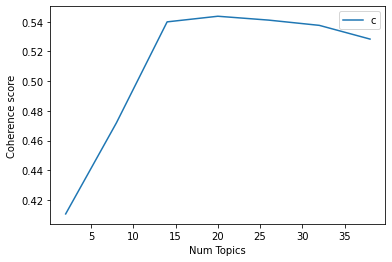

In [98]:
# Show graph
limit=40; start=2; step=6;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()